In [60]:
import pandas as pd  
df = pd.read_csv('dataset_olympics.csv')

In [61]:
# Display the attribute (column) names
print("Attribute names:\n", df.columns)

Attribute names:
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


# Phase 2:
## Attribute Construction:

In [62]:
#make a new column for bmi
df['Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df[['Height', 'Weight','Sex','BMI']].head(10))

   Height  Weight Sex        BMI
0    1.80    80.0   M  24.691358
1    1.70    60.0   M  20.761246
2     NaN     NaN   M        NaN
3     NaN     NaN   M        NaN
4    1.85    82.0   F  23.959094
5    1.85    82.0   F  23.959094
6    1.85    82.0   F  23.959094
7    1.85    82.0   F  23.959094
8    1.85    82.0   F  23.959094
9    1.85    82.0   F  23.959094


## Summary of Raw Data
### Table

In [63]:
summary = df.describe(include='all')

# Print the summary
print("Summary of the dataset:")
print(summary)

Summary of the dataset:
                  ID                              Name    Sex           Age  \
count   70000.000000                             70000  70000  67268.000000   
unique           NaN                             35556      2           NaN   
top              NaN  Oksana Aleksandrovna Chusovitina      M           NaN   
freq             NaN                                29  51877           NaN   
mean    18081.846986                               NaN    NaN     25.644645   
std     10235.613253                               NaN    NaN      6.485239   
min         1.000000                               NaN    NaN     11.000000   
25%      9325.750000                               NaN    NaN     21.000000   
50%     18032.000000                               NaN    NaN     25.000000   
75%     26978.000000                               NaN    NaN     28.000000   
max     35658.000000                               NaN    NaN     88.000000   

              Height       

The provided summary of the dataset illustrates the central tendency of all attributes before any data cleaning processes are applied. This initial summary reveals key statistics, such as counts, unique values, means, medians, and ranges, which help in understanding the distribution and characteristics of the data. Analyzing this summary is crucial for identifying missing values, outliers, and inconsistencies that may need to be addressed during the data cleaning phase.

In [64]:
# Descriptive statistics for numeric values
print(df[['Age','Weight','Height', 'BMI']].describe())

                Age        Weight        Height           BMI
count  67268.000000  52899.000000  53746.000000  52522.000000
mean      25.644645     70.900216      1.755053     22.809656
std        6.485239     14.217489      0.103842      2.939851
min       11.000000     25.000000      1.270000     12.267562
25%       21.000000     61.000000      1.680000     20.957274
50%       25.000000     70.000000      1.750000     22.530864
75%       28.000000     79.000000      1.830000     24.187046
max       88.000000    214.000000      2.230000     63.901580


The summary statistics for the numeric attributes reveal the following insights:<br> Age: Ranges from 11 to 88 years, with a mean of approximately 25.64 years.<br> Weight: Varies from 25 kg to 214 kg, with an average weight of about 70.90 kg.<br> Height: Heights range from 1.27 m to 2.23 m, with a mean height of approximately 1.76 m.<br> BMI: The Body Mass Index ranges from 12.27 to 63.90, with an average of around 22.81.<br> These statistics indicate a diverse population in terms of age, weight, height, and BMI.

In [65]:
# Calculate variance for multiple columns 
var_values = df[['Age','Weight', 'Height', 'BMI']].var()
print('The variance for age, height, weight and BMI is: \n')
print(var_values)

The variance for age, height, weight and BMI is: 

Age        42.058329
Weight    202.136997
Height      0.010783
BMI         8.642721
dtype: float64


The variance provides insights into the data distribution:<BR>
Age: The variance is approximately 42.06, indicating a moderate spread of ages within the dataset.<BR>
Weight: With a variance of about 202.14, this suggests considerable variation in the weights of individuals.<BR>
Height: The variance is very low at 0.01, indicating that heights are relatively consistent among individuals.<BR>
BMI: The variance is approximately 8.64, suggesting some variability in Body Mass Index values.<BR>
Overall, these variance values illustrate the extent of variability in each attribute, highlighting the diversity of the dataset.

### Graph

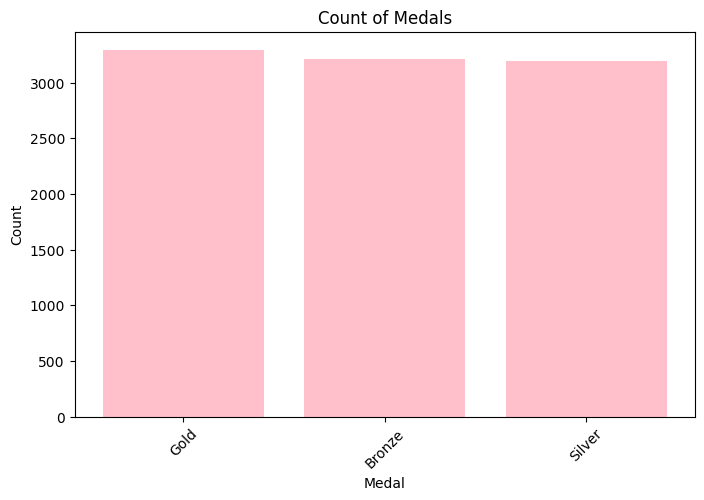

In [66]:
import matplotlib.pyplot as plt
import pandas as pd  

medal_counts = df['Medal'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 5))                     
plt.bar(medal_counts.index, medal_counts.values, color='pink')
plt.title('Count of Medals')   
plt.xlabel('Medal')                           
plt.ylabel('Count')                            
plt.xticks(rotation=45) 
plt.show()

The bar chart above summarizes the medals won (Gold, Silver, Bronze) in the dataset, visualizing the frequency of each medal type for easy comparison and analysis.
The bars are nearly equal in height. This indicates that the dataset has an equal distribution of medal winning (any type of medal),This balanced dataset is a result of controlled sampling.

## Variables Distribution

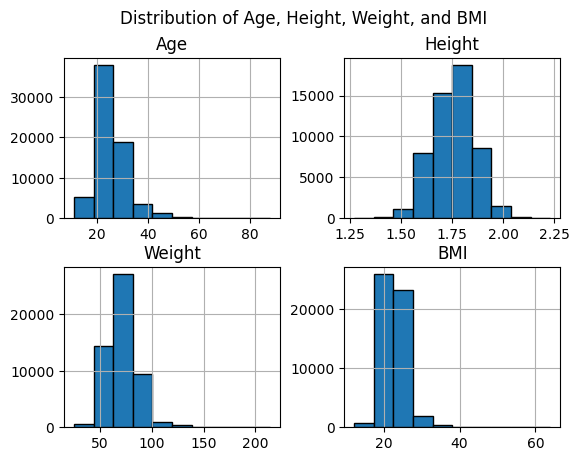

In [67]:
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

df[columns_to_plot].hist(bins=10, edgecolor='black')

plt.suptitle('Distribution of Age, Height, Weight, and BMI')
plt.show()

The Histograms above illustrates the distribution of Age, Height, Weight, and BMI values.

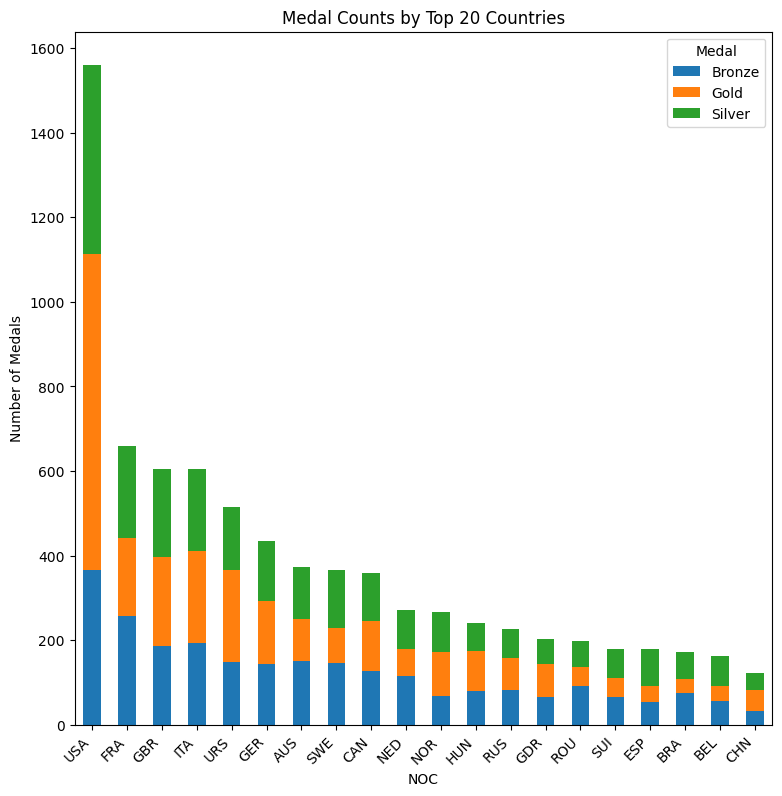

In [68]:
#Top 20 countries by total medals 

# Group by NOC and count medals
medal_counts = df.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)

# Sum the total medals for each country
total_medals = medal_counts.sum(axis=1)

# Get the top 20 countries by total medals
top_20_countries = total_medals.nlargest(20).index

# Filter the medal_counts DataFrame to include only the top 20 countries
top_20_medal_counts = medal_counts.loc[top_20_countries]

# Plot the bar chart
top_20_medal_counts.plot(kind='bar', stacked=True, figsize=(9, 9))
plt.title('Medal Counts by Top 20 Countries')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right') 
plt.show()

The stacked bar chart displays the distribution of Gold, Silver, and Bronze medals for the top 20 countries, facilitating easy comparison of their performances.

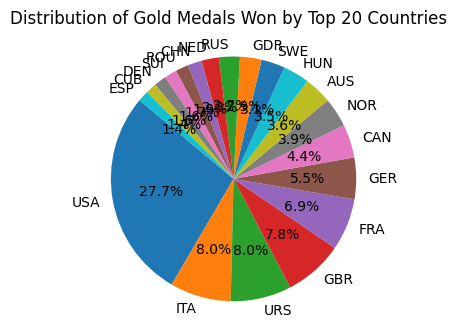

In [69]:
#Top 20 countries winning gold medals
gold_medals = df[df['Medal'] == 'Gold']
gold_medal_counts = gold_medals['NOC'].value_counts().nlargest(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3.5))
plt.pie(gold_medal_counts, labels=gold_medal_counts.index, autopct='%1.1f%%', startangle=140)
plt.suptitle('Distribution of Gold Medals Won by Top 20 Countries')
plt.axis('equal')  
plt.show()

The pie chart illustrates the distribution of Gold medals won by the top 20 countries, highlighting each country's share of the total Gold medals.

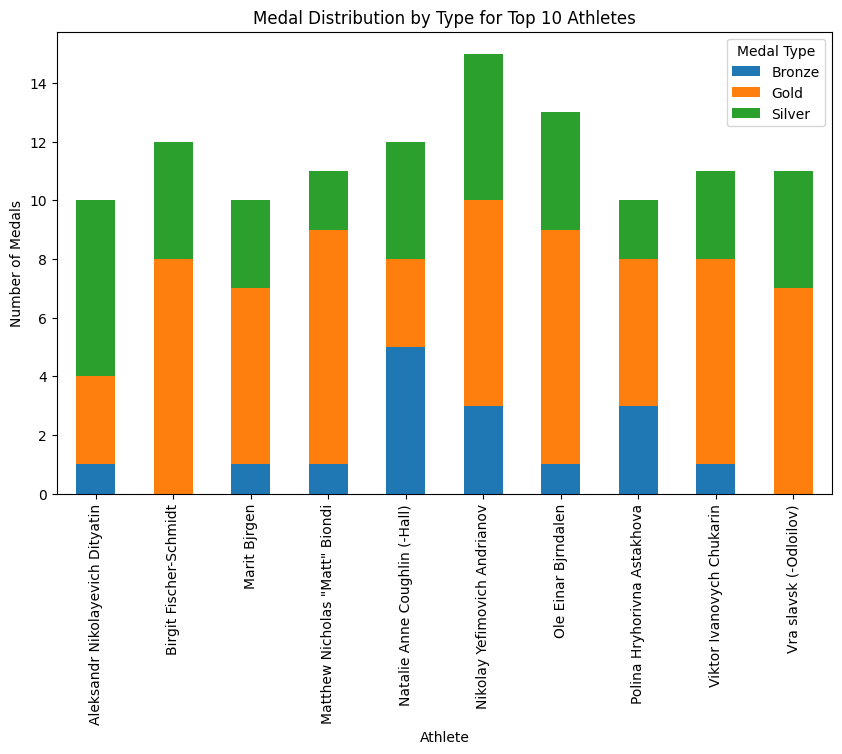

In [70]:
#Top 10 atheletes 
import matplotlib.pyplot as plt

# Filter the dataset for the top 10 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a pivot table to count the medals by type for each athlete
medals_by_type = top_athletes_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)

medals_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Type for Top 10 Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()

The stacked bar chart displays the distribution of medals (Gold, Silver, and Bronze) won by the top 10 athletes, allowing for easy comparison of their achievements.

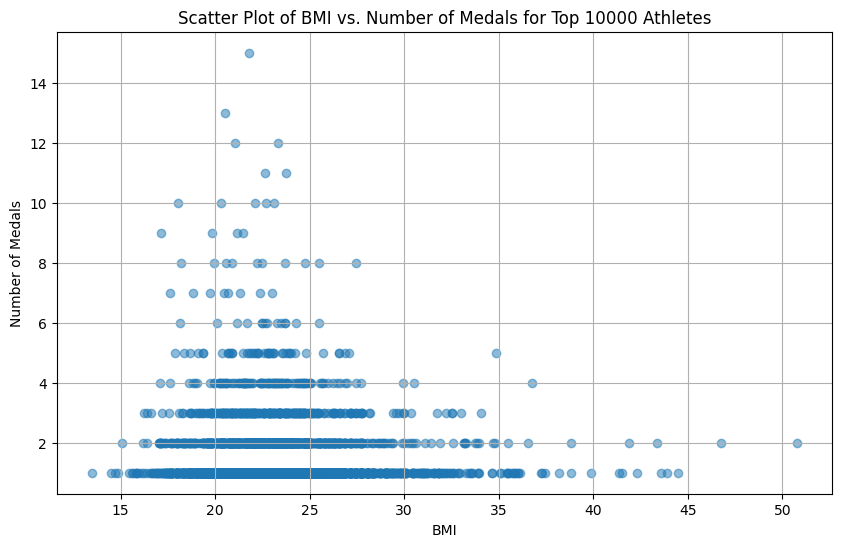

In [71]:
#Top 1000 atheletes and their BMI 

# Filter the dataset for the top 10000 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10000).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a DataFrame to store the number of medals and BMI for each top athlete
athlete_bmi_medals = top_athletes_df.groupby('Name').agg({
    'BMI': 'mean',  # Average BMI for each athlete
    'Medal': 'count'  # Total number of medals for each athlete
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(athlete_bmi_medals['BMI'], athlete_bmi_medals['Medal'], alpha=0.5)

plt.title('Scatter Plot of BMI vs. Number of Medals for Top 10000 Athletes')
plt.xlabel('BMI')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

This Scatter plot is displaying the distribution of Body Mass Index (BMI) across different medal types won by athletes, providing insights into the relationship between BMI and athletic performance.

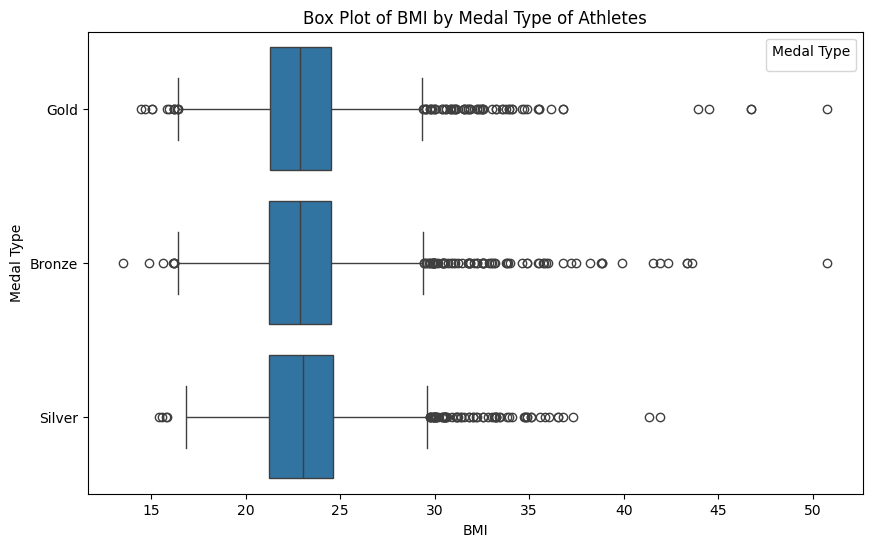

In [72]:
%pip install seaborn

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Medal', data=df)
plt.title('Box Plot of BMI by Medal Type of Athletes')
plt.xlabel('BMI')
plt.ylabel('Medal Type')

# Manually create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Medal Type')

plt.show()

The box plot displays the BMI distribution for athletes by medal type. Each box shows the interquartile range, with the median BMI marked inside. Whiskers extend to the minimum and maximum values, while points beyond the whiskers indicate outliers. This visualization highlights BMI differences among athletes with various medal achievements.

# Data Preprocessing
First, we need to remove rows that has no medal(no class label) before attempting to handle missing values, because the results will be far from true otherwise. 

## Remove noise
Noisy data are data that contains errors, outliers, missing values, or inconsistencies that can affect
the qualityand reliability of your analysis.
We want to remove the noisy data, first by removing unnecessary columns, removing rows that has missing columns,  as well as outliers detection and removal.

**Delete unnecessary columns**

We will remove the rows "Weight","Height" and "Team", considering the newly added BMI column to be derived from "Weight" and "Height", thus, they
are not needed anymore, and it is better to remove them alongside the "Team" column because our study is focused on predicting medal outcomes, and using the column "NOC" will be enough.

In [73]:
import pandas as pd
df.drop(columns=["Height", "Weight","Team"], inplace=True)

**Delete unnecessary rows**

We will remove the rows that has the value of "Year" set to 1999 or less, because it will be considered outdated data.

In [74]:
# Remove rows where 'Year' is 1999 or less
df = df[df['Year'] > 1999]
# Remove rows where the athelete did not win any medals.
df = df[df['Medal'].notna()]
# Display the cleaned DataFrame
print(df)

          ID                           Name Sex   Age  NOC        Games  Year  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter  2014   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter  2006   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer  2008   
...      ...                            ...  ..   ...  ...          ...   ...   
69813  35550         Birgit Fischer-Schmidt   F  42.0  GER  2004 Summer  2004   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer  2004   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer  2000   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer  2016   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter  2002   

       Season            Ci

**Remove rows that have missing columns**

We will avoid removing rows that has the "Medal" missing, because it indicates that the player has not won any medal, and it is an essential information when it comes to our study, but we will remove other columns, using the subset parameter.

In [75]:
import pandas as pd
# Drop rows with missing values, ignoring the 'Medal' column
df_cleaned = df.dropna(subset=["Name", "Sex", "Age","NOC","Games","Year","Season","City","Sport","Event","BMI"])
print("Dataframe after removing rows with missing data (ignoring the Medal column):")
print(df_cleaned)

Dataframe after removing rows with missing data (ignoring the Medal column):
          ID                           Name Sex   Age  NOC        Games  Year  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter  2014   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter  2006   
158       62              Giovanni Abagnale   M  21.0  ITA  2016 Summer  2016   
...      ...                            ...  ..   ...  ...          ...   ...   
69813  35550         Birgit Fischer-Schmidt   F  42.0  GER  2004 Summer  2004   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer  2004   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer  2000   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer  2016   
69988  35653          Casey J. F

**Detect outliers and remove them**

we will use the Z score to detect the outliers in our numerical data ("BMI" and "Age"), after that, we will remove the outliers from the dataframe.

the Z score is a statistical measure that indicates how many standard deviations a data point is away from the mean.

In [76]:
import pandas as pd
from scipy import stats

# Z-score calculation for Age and BMI
z_scores_age = stats.zscore(df["Age"])
z_scores_bmi = stats.zscore(df["BMI"])

# Set a threshold for Z-score (3 standard deviations)
threshold = 3

# Identify outliers based on Z-score
outliers_age = df[abs(z_scores_age) > threshold]
outliers_bmi = df[abs(z_scores_bmi) > threshold]

print("Outliers in Age:")
print(outliers_age)

print("Outliers in BMI:")
print(outliers_bmi)

Outliers in Age:
          ID                                      Name Sex   Age  NOC  \
3304    1858                         Fehaid Al-Deehani   M  45.0  KUW   
3306    1858                         Fehaid Al-Deehani   M  49.0  IOA   
3680    2112                       Abdullah Al-Rashidi   M  52.0  IOA   
4785    2735            Sergey Gennadyevich Alifirenko   M  45.0  RUS   
9417    5167           Kristin Ann Armstrong (-Savola)   F  42.0  USA   
10482   5724                       rad Suleyman Aumova   F  46.0  AZE   
12526   6812                            Kamal Bahamdan   M  42.0  KSA   
13008   7075                             Glenys Bakker   F  43.0  CAN   
13911   7535                               Jesper Bank   M  43.0  DEN   
17222   9213                               Otto Becker   M  45.0  GER   
17552   9349                           Ludger Beerbaum   M  52.0  GER   
18955  10033                            Andrea Benelli   M  44.0  ITA   
19061  10085                      

In [77]:
import pandas as pd
# Filter the DataFrame, keeping only rows with Z-scores below the threshold
df_no_outliers = df[(abs(z_scores_age) < threshold) & (abs(z_scores_bmi) < threshold)]

print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
Empty DataFrame
Columns: [ID, Name, Sex, Age, NOC, Games, Year, Season, City, Sport, Event, Medal, BMI]
Index: []


### Missing Values

In [78]:
# Calculate missing values for all columns
missing_values = df.isna().sum()

# Print missing values for each column
print('Missing values in each column:')
print(missing_values)

# Print the total number of missing values
print('\nTotal number of missing values:', missing_values.sum())

Missing values in each column:
ID         0
Name       0
Sex        0
Age        0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
BMI       18
dtype: int64

Total number of missing values: 18


In total, there are 113,875 missing values across all columns. This high number of missing entries may impact data analysis and interpretation, emphasizing the need for data cleaning and imputation strategies to handle these gaps effectively.

In [79]:
# Print the first 10 rows before handeling missing values
print('First 10 rows before handeling the missing values\n')
print(df.head(10))

First 10 rows before handeling the missing values

     ID                                     Name Sex   Age  NOC        Games  \
40   16                 Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78   20                       Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79   21                Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
158  62                        Giovanni Abagnale   M  21.0  ITA  2016 Summer   
159  63                      Jos Luis Abajo Gmez   M  30.0  ESP  2008 Summer   
161  65                        Patimat Abakarova   F  21.0  AZE  2016 Summer   
163  67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0  RUS  2008 Summer   
172  72         Aleksey Aleksandrovich Abalmasov   M  28.0  BLR  2008 Summer   

     Year  Season            City          Sport  \
40   2014  Winte

The output shows the first 10 rows of the dataset before any missing values have been addressed.
The presence of NaN values, particularly in the Height, Weight, and Medal columns, which suggests that significant data gaps need to be filled.

### Handeling missing values

In [80]:
# Display the DataFrame before filling
print('DataFrame before replacing missing values:')
print(df)

DataFrame before replacing missing values:
          ID                           Name Sex   Age  NOC        Games  Year  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter  2014   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter  2006   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer  2008   
...      ...                            ...  ..   ...  ...          ...   ...   
69813  35550         Birgit Fischer-Schmidt   F  42.0  GER  2004 Summer  2004   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer  2004   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer  2000   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer  2016   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 W

This output displays the DataFrame in its entirety before any missing values are filled. The structure is consistent with the previous output.
The overall shape of the DataFrame is confirmed to be 70,000 rows and 16 columns, illustrating the dataset's scale.

In [81]:
#Handeling missing values
df['ID'] = df['ID'].fillna(-1) 

# Fill missing values for numeric columns with their means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with their modes
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [82]:
# Print the first 10 rows after handeling missing values
print('First 10 rows after handeling the missing values\n')
print(df.head(10))

First 10 rows after handeling the missing values

     ID                                     Name Sex   Age  NOC        Games  \
40   16                 Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78   20                       Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79   21                Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
158  62                        Giovanni Abagnale   M  21.0  ITA  2016 Summer   
159  63                      Jos Luis Abajo Gmez   M  30.0  ESP  2008 Summer   
161  65                        Patimat Abakarova   F  21.0  AZE  2016 Summer   
163  67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0  RUS  2008 Summer   
172  72         Aleksey Aleksandrovich Abalmasov   M  28.0  BLR  2008 Summer   

     Year  Season            City          Sport  \
40   2014  Winter

After handling missing values, the DataFrame is now complete. The 'ID' column has -1 for any missing entries, while numeric columns are filled with their mean values. Categorical columns have been populated with the most frequent values, ensuring no missing data remains. This allows for a clean dataset ready for analysis

In [83]:
# Display the DataFrame after filling
print('DataFrame after replacing missing values:')
print(df)

DataFrame after replacing missing values:
          ID                           Name Sex   Age  NOC        Games  Year  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter  2014   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter  2006   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer  2008   
...      ...                            ...  ..   ...  ...          ...   ...   
69813  35550         Birgit Fischer-Schmidt   F  42.0  GER  2004 Summer  2004   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer  2004   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer  2000   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer  2016   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Wi

The output displays the DataFrame after filling in the missing values. <br>
Each column is complete, with no null entries. Numeric columns show updated values reflecting their mean, while categorical columns display the most frequent values. This provides a comprehensive view of the cleaned dataset, ready for further analysis

### Check and delete duplicate rows.

Duplicate data can result in inaccurate information and a lack of data integrity. It can lead to incorrect calculations and decisions based on wrong data.

In [84]:
import pandas as pd
# find duplicate rows
duplicate_rows = df.duplicated()
# print duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print("Duplicated rows:", [duplicate_rows])

Number of duplicate rows: 0
Duplicated rows: [40       False
73       False
76       False
78       False
79       False
         ...  
69813    False
69835    False
69912    False
69983    False
69988    False
Length: 2879, dtype: bool]


In [85]:
import pandas as pd
# remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

## Categorical data encoding

Since most of our dataframe is made of categorical data, it is best to encode these data to be easier for the machine to read, most machine learning algorithms require numerical input, so categorical variables must be converted to a numerical format.

We will Encode the columns with nominal categorical variables using [One-Hot Encoding] : **Sex, NOC, Games, Season, City, Sport, Event.**

We will use ordinal encoding for the **Medal** column, since the order has a meaning:

-Gold (highest)

-Silver

-Bronze(lowest)

**Medal encoding:**

In [86]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordering for medals
medal_order = ['No Medal', 'Bronze', 'Silver', 'Gold']

# Initialize OrdinalEncoder with the defined order
encoder = OrdinalEncoder(categories=[medal_order])

# Fit and transform the Medal column
df['Medal'] = encoder.fit_transform(df[['Medal']])

print("DataFrame after Ordinal Encoding for Medal:")
print(df)

DataFrame after Ordinal Encoding for Medal:
          ID                           Name Sex   Age  NOC        Games  Year  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter  2014   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter  2002   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter  2006   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer  2008   
...      ...                            ...  ..   ...  ...          ...   ...   
69813  35550         Birgit Fischer-Schmidt   F  42.0  GER  2004 Summer  2004   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer  2004   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer  2000   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer  2016   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 

 **Sex, NOC, Games, Season, City, Sport, Event Encoding:**

In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specified columns
for column in ['Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']:
    df[column] = label_encoder.fit_transform(df[column])

print("DataFrame after Label Encoding:")
print(df)

DataFrame after Label Encoding:
          ID                           Name  Sex   Age  NOC  Games  Year  \
40        16       Juhamatti Tapio Aaltonen    1  28.0   28      7  2014   
73        20             Kjetil Andr Aamodt    1  30.0   63      1  2002   
76        20             Kjetil Andr Aamodt    1  30.0   63      1  2002   
78        20             Kjetil Andr Aamodt    1  34.0   63      3  2006   
79        21      Ragnhild Margrethe Aamodt    0  27.0   63      4  2008   
...      ...                            ...  ...   ...  ...    ...   ...   
69813  35550         Birgit Fischer-Schmidt    0  42.0   32      2  2004   
69835  35565             Mardy Simpson Fish    1  22.0   92      2  2004   
69912  35614                 Doris Fitschen    0  31.0   32      0  2000   
69983  35651  Theresa Matauaina Fitzpatrick    0  21.0   64      8  2016   
69988  35653          Casey J. FitzRandolph    1  27.0   92      1  2002   

       Season  City  Sport  Event  Medal        BMI  
4

## Normalize Data using Min-Max Scaling: 
Normalization was performed to ensure consistent data scale. 
The normalization technique applied is max-min normalization. This technique scales specific attribute values to a specified range from 0 to 1. 
The following attributes were selected for normalization: Age, Year, and BMI.

In [88]:
from sklearn.preprocessing import MinMaxScaler

#Extract columns to normlize
columns_to_normalize = ['Age', 'BMI' , 'Year']  
data_to_normalize=df[columns_to_normalize]

#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(df[columns_to_normalize])

#Replace the normlized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max selected data:")
print(df)

Min-Max selected data:
          ID                           Name  Sex    Age  NOC  Games   Year  \
40        16       Juhamatti Tapio Aaltonen    1  0.325   28      7  0.875   
73        20             Kjetil Andr Aamodt    1  0.375   63      1  0.125   
76        20             Kjetil Andr Aamodt    1  0.375   63      1  0.125   
78        20             Kjetil Andr Aamodt    1  0.475   63      3  0.375   
79        21      Ragnhild Margrethe Aamodt    0  0.300   63      4  0.500   
...      ...                            ...  ...    ...  ...    ...    ...   
69813  35550         Birgit Fischer-Schmidt    0  0.675   32      2  0.250   
69835  35565             Mardy Simpson Fish    1  0.175   92      2  0.250   
69912  35614                 Doris Fitschen    0  0.400   32      0  0.000   
69983  35651  Theresa Matauaina Fitzpatrick    0  0.150   64      8  1.000   
69988  35653          Casey J. FitzRandolph    1  0.300   92      1  0.125   

       Season  City  Sport  Event  Medal

## Discretization
The process of "discretization" for the "year" column is an important tool for data analysis, as it converts continuous time values into specific categories.

In [89]:
#discretization for a specific coulmn
column_to_discretize='Year'
num_bins=3

#perform discretization using the cut
df['discretized_'+ column_to_discretize]=pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

#display columns
print("original DataFrame:")
print(df[['Year' , 'discretized_Year']])

original DataFrame:
        Year  discretized_Year
40     0.875                 2
73     0.125                 0
76     0.125                 0
78     0.375                 1
79     0.500                 1
...      ...               ...
69813  0.250                 0
69835  0.250                 0
69912  0.000                 0
69983  1.000                 2
69988  0.125                 0

[2879 rows x 2 columns]


## Feature Selection

We will use 3 feature selection techniques:

**Variance Threshold**
to select the most important features for our model. By removing features with low variance, this method helps us focus on the variables that have more significant variability, it will improve our ability to analyze athletes performances.


In [90]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Select only numerical features
X = df.select_dtypes(include=['float64', 'int64'])  
y = df['Medal'] 

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.05)  
X_new = selector.fit_transform(X)  

# Display the selected features
selected_features = X.columns[selector.get_support()]  # Get selected feature names
print("\nSelected Features after Variance Threshold:")
print(selected_features)



Selected Features after Variance Threshold:
Index(['ID', 'Year', 'Medal'], dtype='object')


**L1 Regularization** to pick the most important features for our model, by using Regularization, it will allow us to focus on the variables that have the strongest relationship with the outcome whether an athlete wins a gold, silver, or bronze medal.

In [91]:
from sklearn.linear_model import Lasso

# Prepare the target variable
df['Medal'] = df['Medal'].fillna('None') 

X = df.select_dtypes(include=['float64', 'int64']) 

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  

y = df['Medal']  

y = pd.factorize(y)[0]  # Convert 'Medal' to numerical values

# Use L1 Regularization (LASSO) for feature selection
model = Lasso(alpha=0.1)  
model.fit(X_imputed, y)  

# Display the selected features
selected_features = X.columns[model.coef_ != 0]
print("Selected Features for L1 Regularization:", selected_features)



Selected Features for L1 Regularization: Index(['ID', 'Medal'], dtype='object')


**Recursive Feature Elimination (RFE)** in our feature selection process. This method removes the least important features, ensuring that our model retains only the most relevant information, which enhances its ability to predict which athletes are likely to win medals.

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import MinMaxScaler

# Fill missing 'Medal' values with 'None'
df['Medal'] = df['Medal'].fillna('None')

# Label encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Medal'] = LabelEncoder().fit_transform(df['Medal'])

X = df.select_dtypes(include=['float64', 'int64']) 

# Initialize the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  

scaler = MinMaxScaler()
X_imputed_scaled = scaler.fit_transform(X_imputed)  


y = df['Medal'] 

# Use RFE with Logistic Regression
model = LogisticRegression(max_iter=3000)  
rfe = RFE(model, n_features_to_select=2)  
X_new = rfe.fit_transform(X_imputed_scaled, y)  

# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: ['Age', 'BMI']


# Saving the changes done on the dataset.

In [93]:
df.to_csv('preprocessed_data.csv', index=False)